In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !pip install tensorflow

In [3]:
from tensorflow.keras.datasets import imdb

2025-02-03 09:49:45.943938: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 09:49:45.948023: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 09:49:45.961183: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738556385.983435   47284 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738556385.990103   47284 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
vocab_size = 10000

In [5]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words= vocab_size)

In [6]:
# imdb.get_word_index()

In [7]:
y_train[0]

1

In [8]:
x_test[0]

[1,
 591,
 202,
 14,
 31,
 6,
 717,
 10,
 10,
 2,
 2,
 5,
 4,
 360,
 7,
 4,
 177,
 5760,
 394,
 354,
 4,
 123,
 9,
 1035,
 1035,
 1035,
 10,
 10,
 13,
 92,
 124,
 89,
 488,
 7944,
 100,
 28,
 1668,
 14,
 31,
 23,
 27,
 7479,
 29,
 220,
 468,
 8,
 124,
 14,
 286,
 170,
 8,
 157,
 46,
 5,
 27,
 239,
 16,
 179,
 2,
 38,
 32,
 25,
 7944,
 451,
 202,
 14,
 6,
 717]

In [9]:
from tensorflow.keras.preprocessing import sequence

In [10]:
max_len = 500

In [11]:
X_train = sequence.pad_sequences(x_train, maxlen = max_len)

In [12]:
X_test = sequence.pad_sequences(x_test, maxlen = max_len)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding, Input
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard


In [14]:
model = Sequential()

In [15]:

dim = 150
model.add(Embedding(input_dim=vocab_size, output_dim=dim))
model.add(SimpleRNN(150))
model.add(Dense(1, activation='sigmoid'))

2025-02-03 09:49:53.305792: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
early_stop = EarlyStopping(patience = 5)

In [18]:
board = TensorBoard(
    log_dir='logs/fit',
    histogram_freq=1,
    write_graph=True,
)

In [19]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stop, board])

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 262s 332ms/step - accuracy: 0.5561 - loss: 0.6820 - val_accuracy: 0.6130 - val_loss: 0.6408
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 259s 331ms/step - accuracy: 0.6920 - loss: 0.5883 - val_accuracy: 0.6313 - val_loss: 0.6351
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 282s 357ms/step - accuracy: 0.7378 - loss: 0.5342 - val_accuracy: 0.7044 - val_loss: 0.5704
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 281s 359ms/step - accuracy: 0.7866 - loss: 0.4621 - val_accuracy: 0.6700 - val_loss: 0.6222
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 262s 335ms/step - accuracy: 0.7989 - loss: 0.4391 - val_accuracy: 0.7720 - val_loss: 0.5066
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 255s 326ms/step - accuracy: 0.8501 - loss: 0.3557 - val_accuracy: 0.7797 - val_loss: 0.5290
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 257s 328ms/step - accuracy: 0.8561 - loss: 0.3517 - val_accuracy: 0.7588 - val_loss: 0.5310
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 239s 306ms/step - accuracy: 

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 150)       │     1,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,635,905 (17.68 MB)

 Trainable params: 1,545,301 (5.89 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,090,604 (11.79 MB)

<Axes: >

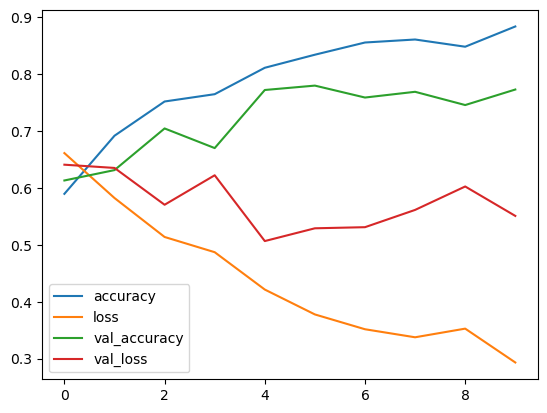

In [21]:
pd.DataFrame(history.history).plot()

In [22]:
model.save('IMBD.keras')